In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

mat = scipy.io.loadmat('spamData.mat')
mat['Xtest'] = (mat['Xtest'] > 0).astype(int)
mat['Xtrain'] = (mat['Xtrain'] > 0).astype(int)

In [3]:
conc_Xtrain = np.concatenate((mat['Xtrain'],mat['ytrain']),axis = 1)
print(conc_Xtrain)
print(mat['Xtrain'])
print(mat['ytrain'])

[[0 0 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[0 0 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
[[1]
 [1]
 [0]
 ...
 [0]
 [1]
 [1]]


In [4]:
idx = conc_Xtrain[:,-1] == 1

print(conc_Xtrain[idx])
print(len(conc_Xtrain[idx])) #1199 this is for class 1
print(conc_Xtrain[~idx])
print(len(conc_Xtrain[~idx])) #1866 this is for class 0

[[0 0 0 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [1 0 1 ... 1 1 1]
 ...
 [0 0 1 ... 1 1 1]
 [0 0 1 ... 1 1 1]
 [0 0 0 ... 1 1 1]]
1199
[[0 0 0 ... 1 1 0]
 [0 0 1 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]]
1866


In [5]:
L_ML = len(conc_Xtrain[idx]) / 3065 #fixed no matter what, lambda_ML
ln_L_ML = np.log(L_ML) #fixed no matter what, ln_of_lambda_ML

before_log_start_y1 = np.sum(conc_Xtrain[idx],axis = 0)[0:57] #fixed no matter what, this is to compute N1 for class 1 for all 
#57 features
before_log_start_y0 = np.sum(conc_Xtrain[~idx],axis = 0)[0:57] #fixed no matter what, this is to compute N1 for class 0 for all
#57 features

def posterior(before_log_y,Xtest_line_by_line): #this function is correct do not touch, this function is to compute the posterior
    sidx1 = Xtest_line_by_line.argsort(kind='mergesort') #for either class 1 or 0 without adding the ln_L_ML and ln(1-L_ML)
    b_sorted1 = Xtest_line_by_line[sidx1] #respectively yet
    a_sorted1 = before_log_y[sidx1]
    
    cut_idx1 = np.flatnonzero(np.r_[True,b_sorted1[1:] != b_sorted1[:-1],True])
    out1 = [a_sorted1[i:j] for i,j in zip(cut_idx1[:-1],cut_idx1[1:])]
    out1[0] = np.log(1-out1[0])
    out1[1] = np.log(out1[1])
    total_sum = sum(out1[0])+sum(out1[1])
    return total_sum
result_list = []
result_list_train = []
for alpha in np.arange(0,100.5,0.5):
    before_log_y1 = (alpha+before_log_start_y1)/(len(conc_Xtrain[idx])+2*alpha) #(N1 + a)/(N + a + b) for class 1
    before_log_y0 = (alpha+before_log_start_y0)/(len(conc_Xtrain[~idx])+2*alpha) #(N1 + a)/(N + a + b) for class 0

    correct = 0
    correct_train = 0
    for k in range(1536):
        posterior_y1 = posterior(before_log_y1,mat['Xtest'][k]) + ln_L_ML
        posterior_y0 = posterior(before_log_y0,mat['Xtest'][k]) + np.log(1-L_ML)
        if (posterior_y1 > posterior_y0) == (mat['ytest'].flatten())[k]: #computes the full posterior for both classes, do the
            correct += 1  #prediction, and compute test error rate
    
    for k in range(3065):
        posterior_y1 = posterior(before_log_y1,mat['Xtrain'][k]) + ln_L_ML
        posterior_y0 = posterior(before_log_y0,mat['Xtrain'][k]) + np.log(1-L_ML)
        if (posterior_y1 > posterior_y0) == (mat['ytrain'].flatten())[k]: #computes the full posterior for both classes, do the
            correct_train += 1  #prediction, and compute training error rate        
    
    print("a=" + str(alpha) + " correct: " + str(1-correct/1536))
    print("a=" + str(alpha) + " correct: " + str(1-correct_train/3065))
    result_list.append(1-correct/1536)
    result_list_train.append(1-correct_train/3065)
    
print(result_list) #printing the test error rate list
print(result_list_train) #printing the training error rate list
    
#print(np.sum(np.array(out1), axis=1))
#respective_sum = np.sum(out1, axis=1)
#print(respective_sum)

#print(sidc)
#print(sidx)
#print(b_sorted1)
#print(a_sorted1)
#print(out1)
#print(out1[0])
#print(out1[1])
#print(len(out1[1]))
#print(sum(b_sorted1))
#print(a)
#print(b)
#print(out[1])

a=0.0 correct: 0.11328125
a=0.0 correct: 0.11549755301794451
a=0.5 correct: 0.11328125
a=0.5 correct: 0.11549755301794451
a=1.0 correct: 0.11588541666666663
a=1.0 correct: 0.11549755301794451
a=1.5 correct: 0.11588541666666663
a=1.5 correct: 0.11549755301794451
a=2.0 correct: 0.11588541666666663
a=2.0 correct: 0.11582381729200653
a=2.5 correct: 0.11588541666666663
a=2.5 correct: 0.11615008156606854
a=3.0 correct: 0.11588541666666663
a=3.0 correct: 0.11615008156606854
a=3.5 correct: 0.11653645833333337
a=3.5 correct: 0.11615008156606854
a=4.0 correct: 0.11653645833333337
a=4.0 correct: 0.11615008156606854
a=4.5 correct: 0.1171875
a=4.5 correct: 0.11647634584013056
a=5.0 correct: 0.11783854166666663
a=5.0 correct: 0.11647634584013056
a=5.5 correct: 0.11783854166666663
a=5.5 correct: 0.11647634584013056
a=6.0 correct: 0.11783854166666663
a=6.0 correct: 0.11680261011419246
a=6.5 correct: 0.11848958333333337
a=6.5 correct: 0.11778140293637851
a=7.0 correct: 0.11848958333333337
a=7.0 correct

a=59.5 correct: 0.125
a=59.5 correct: 0.134747145187602
a=60.0 correct: 0.125
a=60.0 correct: 0.134747145187602
a=60.5 correct: 0.125
a=60.5 correct: 0.1350734094616639
a=61.0 correct: 0.125
a=61.0 correct: 0.1350734094616639
a=61.5 correct: 0.125
a=61.5 correct: 0.13539967373572592
a=62.0 correct: 0.125
a=62.0 correct: 0.13572593800978794
a=62.5 correct: 0.125
a=62.5 correct: 0.13539967373572592
a=63.0 correct: 0.125
a=63.0 correct: 0.13539967373572592
a=63.5 correct: 0.12565104166666663
a=63.5 correct: 0.13572593800978794
a=64.0 correct: 0.12565104166666663
a=64.0 correct: 0.13539967373572592
a=64.5 correct: 0.12565104166666663
a=64.5 correct: 0.13539967373572592
a=65.0 correct: 0.125
a=65.0 correct: 0.13539967373572592
a=65.5 correct: 0.12565104166666663
a=65.5 correct: 0.13539967373572592
a=66.0 correct: 0.12565104166666663
a=66.0 correct: 0.13605220228384995
a=66.5 correct: 0.12565104166666663
a=66.5 correct: 0.13605220228384995
a=67.0 correct: 0.12565104166666663
a=67.0 correct: 

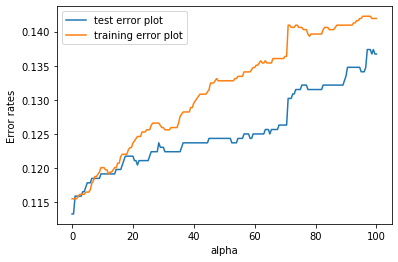

In [6]:
plt.plot(np.arange(0,100.5,0.5), result_list, label = 'test error plot')
plt.plot(np.arange(0,100.5,0.5), result_list_train, label = 'training error plot')
plt.xlabel('alpha')
plt.ylabel('Error rates')
plt.legend()
plt.show()